In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# load results of base case
base_results = load_results('../data/output/EMA/seedAnalysis01.tar.gz')
base_outcomes = pd.DataFrame(base_results[1])

In [11]:
def plot_convergence(outcomes):
    # create plot axis
    fig, axs = plt.subplots(3, 3, figsize=(20,5))

    # make copy of results
    con = outcomes.copy()

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'average mean speed'] = con.loc[:index, 'meanSpeed'].mean()
        con.loc[index, 'average mean density area 1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'average max density area 1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'average mean density area 2'] = con.loc[:index, 'meanDensityArea2'].mean()
        con.loc[index, 'average max density area 2'] = con.loc[:index, 'maxDensityArea2'].mean()
        con.loc[index, 'average mean density area 3'] = con.loc[:index, 'meanDensityArea3'].mean()
        con.loc[index, 'average max density area 3'] = con.loc[:index, 'maxDensityArea3'].mean()
        con.loc[index, 'average mean density area 4'] = con.loc[:index, 'meanDensityArea4'].mean()
        con.loc[index, 'average max density area 4'] = con.loc[:index, 'maxDensityArea4'].mean()


    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='average mean speed'
    )
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='average mean density area 1'
    )
    sns.lineplot(
        ax=axs[0][2],
        data=con,
        x=con.index,
        y='average max density area 1'
    )
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='average mean density area 2'
    )
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='average max density area 2'
    )
    sns.lineplot(
        ax=axs[1][2],
        data=con,
        x=con.index,
        y='average mean density area 3'
    )
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='average max density area 3'
    )
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='average mean density area 4'
    )
    sns.lineplot(
        ax=axs[2][2],
        data=con,
        x=con.index,
        y='average max density area 4'
    )

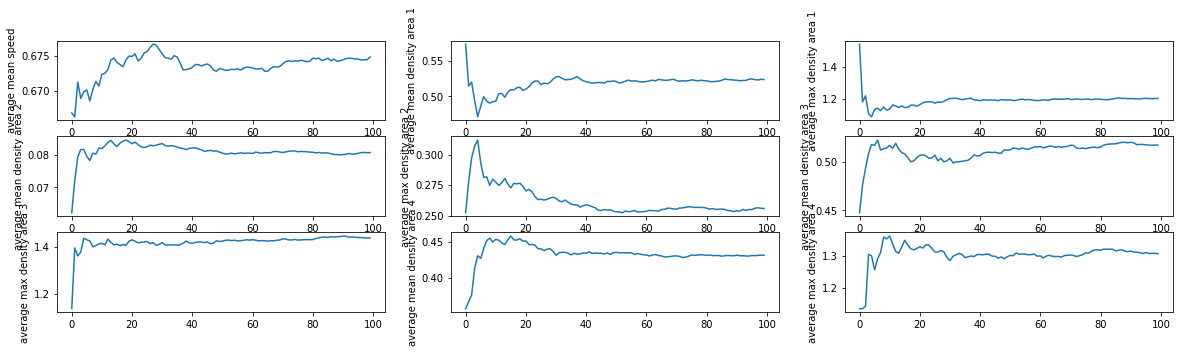

In [14]:
plot_convergence(base_outcomes)